In [21]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
n_task_per_file = 10
n_files = 10
base_dir = "toy_stage2_full_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [23]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [24]:
coverage_df = coverage_df.drop(["Tree val", "Naive"], axis=1)
coverage_df

,1.0,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,1.000000,1.000000,0.833333,0.857143,1.000000,0.833333
1,0.833333,0.833333,1.000000,1.000000,0.833333,1.000000
2,0.666667,1.000000,1.000000,0.833333,1.000000,1.000000
3,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.833333,1.000000,0.833333,0.666667,1.000000,0.833333
...,...,...,...,...,...,...
0,0.833333,1.000000,1.000000,0.833333,0.500000,1.000000
1,0.500000,1.000000,0.833333,1.000000,0.857143,1.000000
2,1.000000,1.000000,0.833333,1.000000,0.833333,0.833333
3,0.400000,0.666667,0.833333,0.857143,1.000000,1.000000


In [25]:
length_df = length_df.drop(["Tree val", "Naive"], axis=1)
length_df

,1.0,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,1.418755,3.895045,2.847981,2.610729,2.221367,2.004146
1,2.064678,3.881247,2.857391,2.431454,2.153402,2.011266
2,1.195216,3.892569,2.878134,2.449271,2.205467,2.020659
3,1.213014,3.899004,2.842823,2.220965,2.191617,1.837562
4,1.195600,3.808812,2.941760,2.424997,2.174680,1.987001
...,...,...,...,...,...,...
0,1.584507,4.149032,2.828315,2.425090,2.204691,2.058424
1,1.268650,4.129102,2.855251,2.609794,2.333167,2.153848
2,1.202109,3.871922,2.859392,2.457835,2.185579,2.026615
3,1.059630,3.874938,2.861832,2.586737,2.190163,2.041763


In [26]:
MSE_df = MSE_df.drop(["Tree val", "Naive"], axis=1)

In [27]:
MSE_df.mean()

1.0       4.570299
UV_0.1    4.611514
UV_0.2    4.649375
UV_0.3    4.684065
UV_0.4    4.763160
UV_0.5    4.824445
dtype: float64

In [28]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            if metric == "Coverage":
                axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey', linewidth=1)
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            #if len_baseline_key:
            #    axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(3,6.5)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey',
                                linewidth=2)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 RRT(1)     0.823465
UV(0.1)    0.901549
UV(0.2)    0.905221
UV(0.3)    0.914515
UV(0.4)    0.886632
UV(0.5)    0.900631
dtype: float64
Length :
 RRT(1)     1.712979
UV(0.1)    3.919506
UV(0.2)    2.893918
UV(0.3)    2.468801
UV(0.4)    2.214476
UV(0.5)    2.049742
dtype: float64
MSE :
 RRT(1)     4.570299
UV(0.1)    4.611514
UV(0.2)    4.649375
UV(0.3)    4.684065
UV(0.4)    4.763160
UV(0.5)    4.824445
dtype: float64


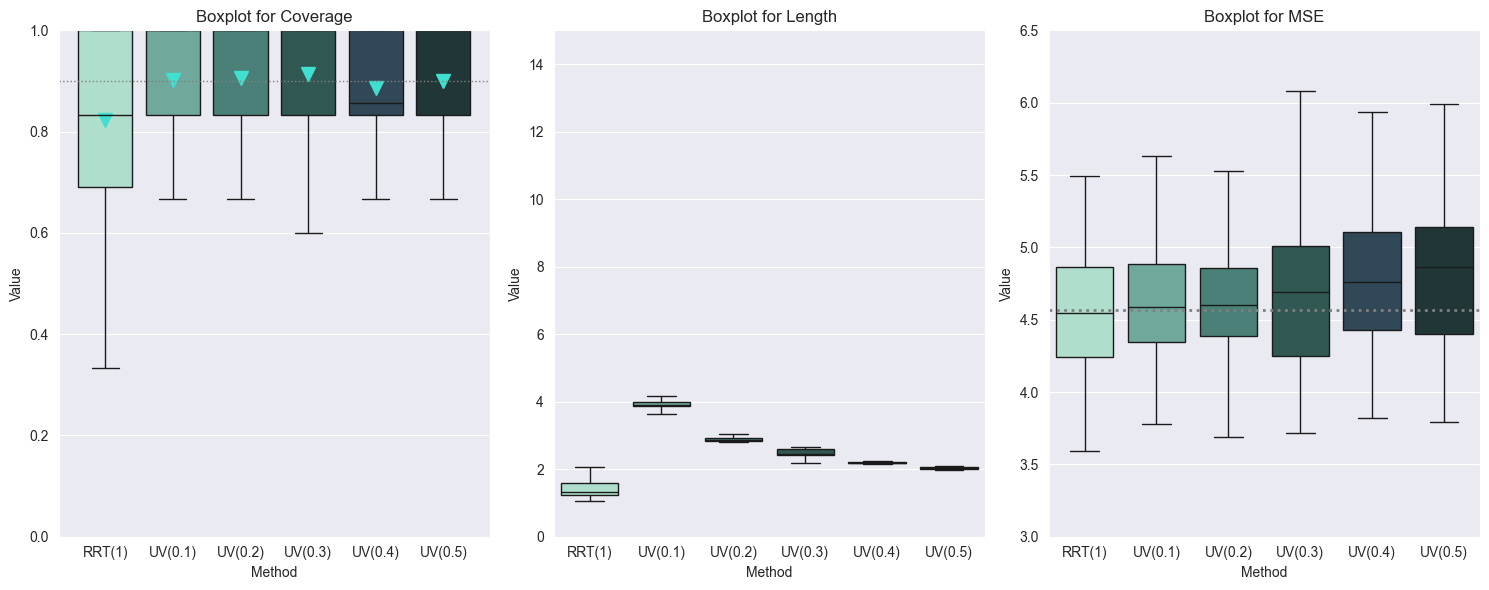

In [29]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=15,
         len_baseline_key="RRT(1)",
         MSE_baseline_key="RRT(1)",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["RRT(1)", "UV(0.1)", "UV(0.2)", "UV(0.3)", "UV(0.4)", "UV(0.5)"], 
         palette=["#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D", "#1E3A3A"])